# Load previously cleaned and merged properties (comps)

The file being imported below was constructed in the last seven exploratory notebooks (1.0 to 1.6). These data have been cleaned and merged so we can start the exploratory data analysis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import Table, save_pickle

In [3]:
plt.style.use('seaborn-poster')

In [4]:
comps_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
assert comps_fn.exists()

with open(comps_fn, 'rb') as f:
    comps = pickle.load(f)

In [5]:
comps.shape

(957687, 83)

In [6]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957687 entries, 0 to 957686
Data columns (total 83 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   acct                                            957687 non-null  uint64        
 1   dscr                                            957687 non-null  category      
 2   date_erected                                    957687 non-null  uint16        
 3   yr_remodel                                      86406 non-null   float64       
 4   im_sq_ft                                        957684 non-null  float64       
 5   act_ar                                          957687 non-null  uint16        
 6   heat_ar                                         957683 non-null  float64       
 7   gross_ar                                        957687 non-null  uint16        
 8   eff_ar                            

In [7]:
comps.sample(10)

,acct,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
672392,1135250000014,Excellent,1982,NaN,3737.0,4745,3737.0,4745,3864.0,650.0,...,624.0,84.0,0.0,Very Poor,NaN,Brick / Masonry,Slab,A+,Central Heat/AC,Very Poor
132947,1326040010010,Good,2012,NaN,2413.0,3483,2413.0,3483,2800.0,250.0,...,0.0,290.0,115.0,Average,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
526793,1025720000090,Average,1972,NaN,2067.0,2507,2067.0,2507,2025.0,184.0,...,0.0,0.0,0.0,Average,NaN,Brick / Masonry,Slab,C,Central Heat/AC,Average
881784,1203940010004,Good,2002,NaN,1839.0,2291,1839.0,2291,2010.0,250.0,...,0.0,0.0,32.0,Average,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
242641,600330000004,Good,1938,1986.0,3549.0,4638,3549.0,4638,3794.0,458.0,...,0.0,221.0,0.0,Good,Total,Brick / Veneer,Crawl Space,B-,Central Heat/AC,Good
482443,980870000011,Average,1966,NaN,1290.0,1720,1290.0,1720,1432.0,146.0,...,0.0,430.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
541565,1045080000026,Average,1968,NaN,1753.0,2234,1753.0,2234,1926.0,206.0,...,0.0,208.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
402866,850870000083,Average,1956,NaN,1394.0,2470,1394.0,2470,1638.0,230.0,...,0.0,36.0,0.0,Fair,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Fair
350710,790990010026,Average,1956,1970.0,1698.0,1782,1698.0,1782,1711.0,178.0,...,0.0,0.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C-,None,Average
57347,1272870040020,Average,2005,NaN,1872.0,2346,1872.0,2346,1944.0,290.0,...,0.0,0.0,54.0,Average,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average


## Drop account numbers
The account numbers are kept as a reference to the raw data, but should not be used in the EDA. Since they are unique, let's use them as index in the comps dataframe.

In [8]:
comps['acct'].is_unique

True

In [9]:
comps.set_index('acct', inplace=True)

In [10]:
comps.sample(10)

,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,fireplace_masonry_firebrick,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
acct,,,,,,,,,,,,,,,,,,,,,
730990030048,Average,1947,1997.0,1416.0,1634,1416.0,1634,1497.0,196.0,0.0,...,0.0,28.0,0.0,Average,Extensive,Aluminum / Vinyl,Slab,C,Central Heat/AC,Average
953010000003,Good,1962,NaN,3090.0,3777,3090.0,3777,3293.0,288.0,0.0,...,0.0,0.0,287.0,Fair,NaN,Brick / Veneer,Slab,B,Central Heat/AC,Fair
1051220000041,Average,1976,NaN,1116.0,1552,1116.0,1552,1282.0,174.0,0.0,...,0.0,0.0,0.0,Good,NaN,Stucco,Slab,C,Central Heat/AC,Good
1011280000022,Average,1969,NaN,2091.0,2378,2091.0,2378,2186.0,242.0,1.0,...,0.0,189.0,0.0,Fair,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Fair
1140060000001,Average,1981,NaN,1831.0,2363,1831.0,2363,1963.0,294.0,1.0,...,669.0,48.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
542970000008,Average,1930,NaN,1103.0,1279,1103.0,1279,1155.0,162.0,1.0,...,0.0,0.0,80.0,Poor,NaN,Brick / Veneer,Crawl Space,C,Central Heat/AC,Poor
871950000012,Good,1973,NaN,4432.0,5566,4432.0,5566,4514.0,412.0,1.0,...,0.0,218.0,168.0,Good,NaN,Brick / Veneer,Slab,B,Central Heat/AC,Average
771530170354,Average,1999,NaN,1377.0,1890,1377.0,1890,1570.0,196.0,0.0,...,0.0,0.0,50.0,Average,New / Rebuilt,Frame / Concrete Blk,Slab,C-,Central Heat/AC,Average
861860000013,Average,1959,NaN,1481.0,1686,1481.0,1686,1511.0,192.0,0.0,...,0.0,49.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average


# Build target column
The purpose of this work is to find if a given property was fairly appraised when compared with with similar properties.

For this we could find the distribution of similar properties total appraised value (`tot_appr_val`) and locate where our target distribution falls. However, since there is a wide range of property values given their location (neighborhood), physical condition, renovation, and other factors, it might be best to focus on the year-to-year percent change in property value:

`yy_pct_change` = (`tot_appr_val` - `prior_tot_appr_val`) / `prior_tot_appr_val`

## Drop NaNs in value colums

In [11]:
cond0 = comps['prior_tot_appr_val'].isna()
cond1 = comps['tot_appr_val'].isna()

In [12]:
print(f'Percent of prior_tot_appr_val missing values: {cond0.sum() / cond0.shape[0]}')
print(f'Percent of tot_appr_val missing values: {cond1.sum() / cond1.shape[0]}')

Percent of prior_tot_appr_val missing values: 0.0017416963997631794
Percent of tot_appr_val missing values: 6.2650949631769045e-06


In [13]:
comps = comps.loc[~cond0 & ~cond1, :]

## Drop samples where prior_tot_appr_val is zero

In [14]:
cond0 = comps['prior_tot_appr_val'] == 0

cond0.sum()

30

In [15]:
comps = comps.loc[~cond0, :]

## Check tot_appr_val

In [16]:
from src.visualization.visualize import plot_ecdf, plot_counts, plot_hist

In [17]:
col ='tot_appr_val'
series = comps[col]

In [18]:
series.describe()

count    9.559870e+05
mean     2.191061e+05
std      2.800812e+05
min      1.000000e+02
25%      1.000000e+05
50%      1.501060e+05
75%      2.342280e+05
max      1.726682e+07
Name: tot_appr_val, dtype: float64

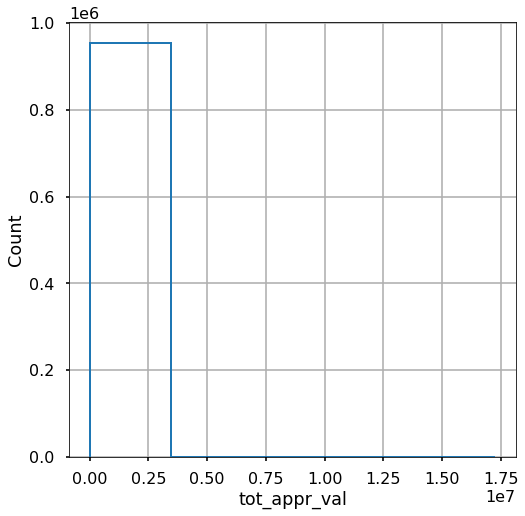

In [19]:
plot_hist(series, col)

The high valued properties are masking the distribution of the lower valued properties in this histogram. Let's remake this figure with only properties valued less than $500k.

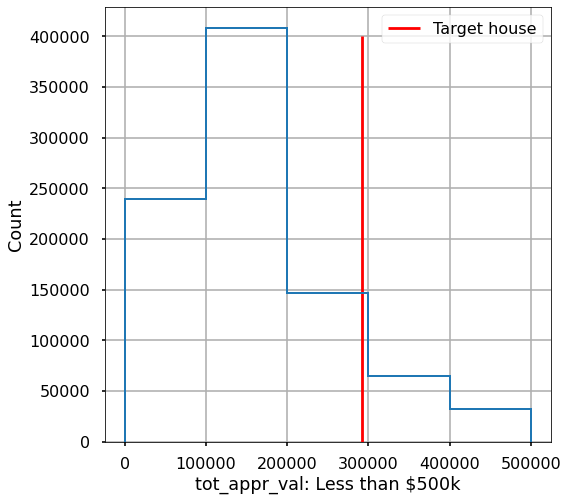

In [20]:
plot_hist(series[series < 500000], col + ': Less than $500k')
_ = plt.vlines(292707, 0, 400_000, color='red', label='Target house')
_ = plt.legend(loc='upper right')

The target house is on the high tail of the distribution of all single-family houses in HCAD. Perhaps we can remove the effect of the property's appraisal value magnitude by calculating the year-to-year percent change in value.

## Build year-to-year percent change value

In [21]:
comps['yy_pct_change'] = (comps['tot_appr_val'] - comps['prior_tot_appr_val']) / comps['prior_tot_appr_val']

In [22]:
comps['yy_pct_change'].describe()

count    955987.000000
mean          0.165984
std           8.581103
min          -0.870447
25%           0.030657
50%           0.099989
75%           0.099999
max        7151.941176
Name: yy_pct_change, dtype: float64

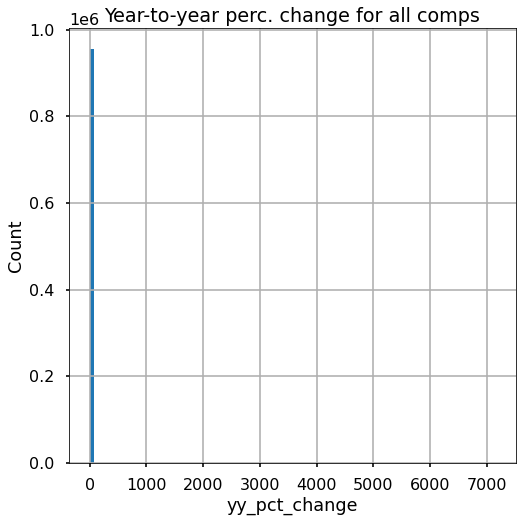

In [23]:
_ = plt.figure(figsize=(8,8))
_ = comps['yy_pct_change'].hist(bins=100)
_ = plt.title('Year-to-year perc. change for all comps')
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')

In [24]:
comps['yy_pct_change'].describe()

count    955987.000000
mean          0.165984
std           8.581103
min          -0.870447
25%           0.030657
50%           0.099989
75%           0.099999
max        7151.941176
Name: yy_pct_change, dtype: float64

There are valid reasons for a property value appreciation from year-to-year to be multiples of the initial value, for example, when a new house is constructed on an existing lot, the previous year value will be the value of the land alone, and the current year value will be the value of the land plus the value of the improvement (built house).

Similarly, when the existing house in the prior year is a tear-down, we can expect the value of the property to increase significantly if the owner has removed the old house and built a new one on its place. This is fairly common on neighborhoods with new constructions restrictions, like The Heights.

Also, we can expect a large value increase if there has been a major remodeling that either increased the number of rooms of baths (fixtures), common on fixer-uppers, but this work generally increases the value of a property by a fraction, and not whole multipliers.

Finally, I think these large (7151%) appreciation values could be errors in the data, or properties that sold under the 10% cap benefits in very expensive neighborhoods. After the sale the cap no longer applies, and thus the property is assess to its true market value.

Let's zoom-in properties appreciated less than 100%.

In [25]:
comps_app_lt_1 = comps.loc[comps['yy_pct_change'] < 1, :].copy()

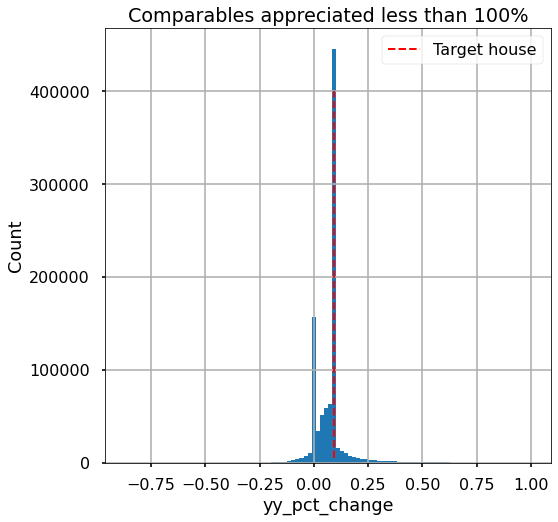

In [26]:
_ = plt.figure(figsize=(8,8))
_ = comps_app_lt_1['yy_pct_change'].hist(bins=100)
_ = plt.vlines(0.093, 5_000, 400_000, color='red', linestyle='--', linewidth=2, label='Target house')
_ = plt.title('Comparables appreciated less than 100%')
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')
_ = plt.legend(loc='upper right')

In [27]:
print(comps_app_lt_1['yy_pct_change'].value_counts(bins=100))
print(comps_app_lt_1['yy_pct_change'].value_counts(bins=100, normalize=True))

(0.0833, 0.102]       446134
(-0.0102, 0.00854]    157551
(0.0646, 0.0833]       63198
(0.0459, 0.0646]       59268
(0.0272, 0.0459]       51917
                       ...  
(-0.758, -0.74]            2
(-0.683, -0.665]           1
(-0.814, -0.796]           1
(-0.721, -0.702]           0
(-0.852, -0.833]           0
Name: yy_pct_change, Length: 100, dtype: int64
(0.0833, 0.102]       0.471943
(-0.0102, 0.00854]    0.166665
(0.0646, 0.0833]      0.066854
(0.0459, 0.0646]      0.062697
(0.0272, 0.0459]      0.054920
                        ...   
(-0.758, -0.74]       0.000002
(-0.683, -0.665]      0.000001
(-0.814, -0.796]      0.000001
(-0.721, -0.702]      0.000000
(-0.852, -0.833]      0.000000
Name: yy_pct_change, Length: 100, dtype: float64


This is interesting. There is a spike in the 10% value increase mark. This is possibly related to Capped Appraisal Values, where the appraisal district will cap the value of an existing property if the current year appraised value is more than 10% of last year's. Also, the property has to be homestead exempt for the current and prior year to be eligible for this benefit.

We can see in the histogram that about 445000 properties qualified for this capping rule. Neat!

There is a lesser spike near 0 % value increase, but its origin is less clear.

# Select the comparable properties

The histogram on year-to-tear percent change appraise value above shows that most properties appreciated up to 40%, and depreciated down to 25%. While this is insightful, the spread is too broad as it accounts for almost all properties in the district, with all sorts of conditions, year built, neighborhood, and many other variables, and as a result, the target house is well within this distribution.

Next, let's select the comparable properties to my property of interest by counting only properties in the same subdivision.

In [28]:
cond0 = comps['lgl_2'].str.contains('PARK AT KLEIN SEC 1', case=False, na=False, regex=False)

subdiv = comps.loc[cond0, :].copy()

In [29]:
subdiv.shape

(111, 83)

Since we have selected only the houses at the specified subdivision, there are a lot of categorical columns in this subset of samples that are single valued (e.g. `neighborhood_code`, `market_area_1_dscr`, etc.). Let's remove these columns.

In [30]:
for col in subdiv.columns:
    if len(subdiv[col].unique()) == 1:
        subdiv.drop(col,inplace=True,axis=1)

In [31]:
subdiv.shape

(111, 32)

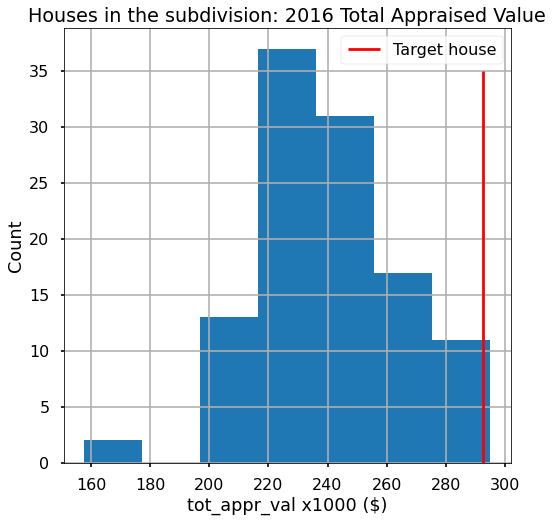

In [32]:
_ = plt.figure(figsize=(8,8))
_ = (subdiv['tot_appr_val']/1000).hist(bins=7)
_ = plt.title('Houses in the subdivision: 2016 Total Appraised Value')
_ = plt.vlines(292707/1000, 0, 35, color='red', label='Target house')
_ = plt.xlabel('tot_appr_val x1000 ($)')
_ = plt.ylabel('Count')
_ = plt.legend(loc='upper right')

## Find subdivision comparables
To make a fair comparison, we should find the properties with similar characteristics to the target property. Let's use an unsupervised learning method to find their grouping.

In [33]:
from sklearn.cluster import KMeans

In [34]:
subdiv.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 111 entries, 1347180010007 to 1347180030038
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_erected            111 non-null    uint16        
 1   im_sq_ft                111 non-null    float64       
 2   act_ar                  111 non-null    uint16        
 3   heat_ar                 111 non-null    float64       
 4   gross_ar                111 non-null    uint16        
 5   eff_ar                  111 non-null    float64       
 6   perimeter               111 non-null    float64       
 7   fireplace_metal_prefab  111 non-null    float32       
 8   fixtures_addl           111 non-null    float32       
 9   fixtures_total          111 non-null    float32       
 10  room_bedroom            111 non-null    float32       
 11  room_full_bath          111 non-null    float32       
 12  room_half_bath          111

For K-Means to work in theory we should remove the non-numerical features. In addition, I'll remove the features directly associated with the value of the property. 

In [35]:
drop = [
    'yy_pct_change',
    'land_val',
    'tot_appr_val',
    'prior_land_val',
    'prior_tot_appr_val',
    'new_own_dt', # Latest purchase date
    'lgl_1', # House lot
    'exterior_wall'
]

In [36]:
subdiv_numeric = subdiv.drop(drop, axis=1)

In [37]:
ks = range(1, 21)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(subdiv_numeric)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

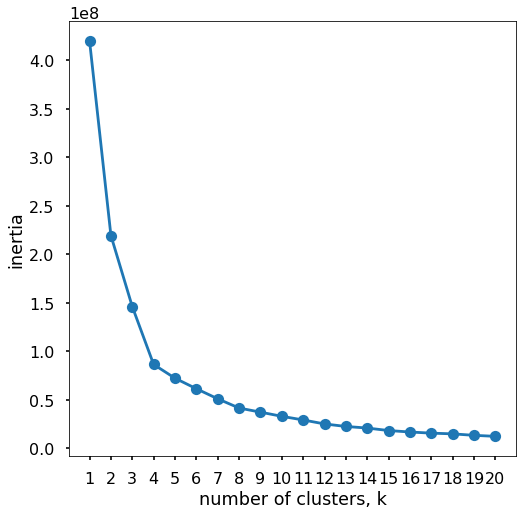

In [38]:
# Plot ks vs inertias
plt.figure(figsize=(8, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

It seems like 8 clusters is a good choice. However, after some trial and error I found that k > 3 makes for one cluster with almost all the samples, and a lot of clusters with very few (~3) samples. For this reason I chose k=3.

In [39]:
model = KMeans(n_clusters=3)

In [40]:
labels = model.fit_predict(subdiv_numeric)

In [41]:
pd.DataFrame({'labels': labels}).value_counts()

labels
0         54
2         40
1         17
dtype: int64

## TSNE
Now let's plot the selected labels using TSNE to find if these groups overlap or are separated.

In [42]:
from sklearn.manifold import TSNE

In [43]:
model = TSNE(learning_rate=100)

In [44]:
transformed = model.fit_transform(subdiv_numeric)

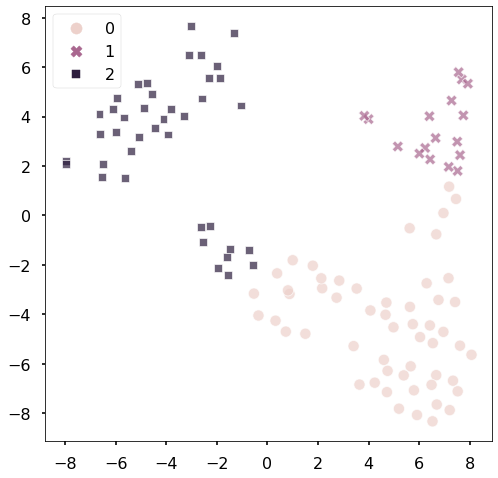

In [45]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=labels, style=labels, alpha=0.7)
plt.show()

Excellent! They are well separated indicating that these groups are meaningful.

Now let's add the labels found with K-meands back to the features dataframe.

In [46]:
subdiv['kmeans_label'] = labels

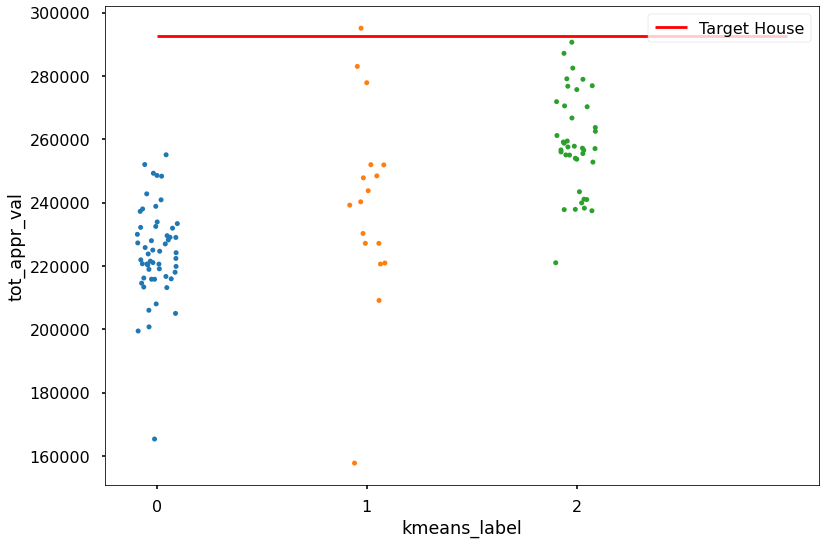

In [47]:
sns.stripplot(x='kmeans_label', y='tot_appr_val', data=subdiv)
plt.hlines(292707, 0, 3, colors='red', label='Target House')
plt.legend(loc='upper right')

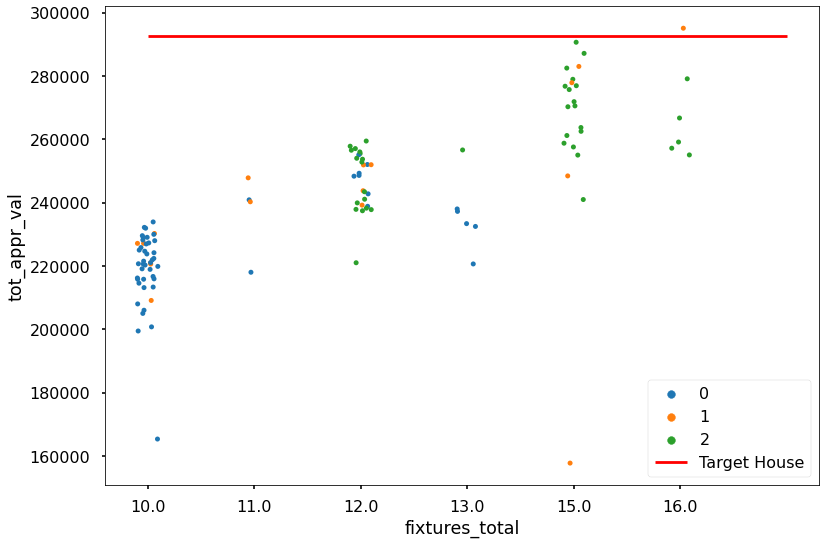

In [48]:
sns.stripplot(x='fixtures_total', y='tot_appr_val', data=subdiv, hue='kmeans_label')
plt.hlines(292707, 0, 6, colors='red', label='Target House')
plt.legend(loc='lower right')

<AxesSubplot:xlabel='im_sq_ft', ylabel='tot_appr_val'>

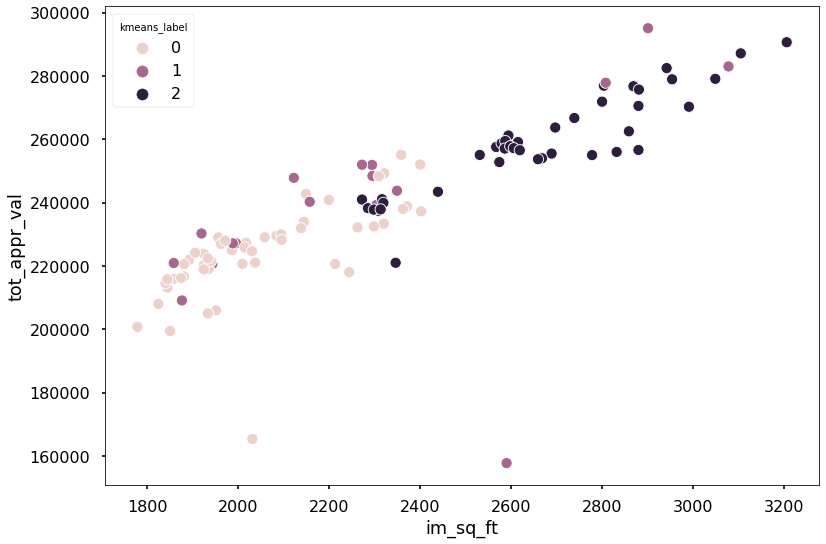

In [49]:
sns.scatterplot(x='im_sq_ft', y='tot_appr_val', data=subdiv, hue='kmeans_label')

## Subdivision comparables

Target property k-means label:

In [50]:
target_house_label = subdiv.loc[1347180010049, 'kmeans_label']
print(f"The target house label is: {target_house_label}")

The target house label is: 2


In [51]:
subdiv_comps = subdiv.loc[subdiv['kmeans_label'] == target_house_label, :]

In [52]:
subdiv_comps.shape

(40, 33)

# Null-hypothesis test

**Population**: Comparable houses appraised by HCAD in the PARK AT KLEIN SEC 1 subdivision.

**Significance level**: 5%

$H_0$: The 2016 appraised value for the target house was fair relative to its comparables.

$H_a$: The 2016 appraised value was unfair, or it doesn't belong to the comparables distribution.

In [53]:
pop_mean = subdiv_comps['tot_appr_val'].mean()
pop_std = subdiv_comps['tot_appr_val'].std(ddof=0)

print(f"The population mean is: ${pop_mean:.2f}")
print(f"The population standard deviation is: ${pop_std:.2f}")

The population mean is: $258853.80
The population standard deviation is: $15200.36


In [54]:
from scipy.stats import norm

In [55]:
zscore = (292707 - pop_mean) / pop_std

In [56]:
zscore

2.227131629768397

In [57]:
pvalue = 1 - norm.cdf(zscore)
print(f"The p-value is: {pvalue:.3f}")

The p-value is: 0.013


Since the p-value (0.013) is below the significance level (0.05) we can say there is reasonable statistical evidence to reject the the null hypothesis, and thus we have statistical evidence to say that the property appraisal was unfair relative to its comparables.

In other words, if the null hypothesis is true, there is a 1.3% probability of getting an appraised value as extreme as $292707 or lager. Since this 1.3\% is below the 5\% significance level (z=1.645), we reject the null hypothesis.  

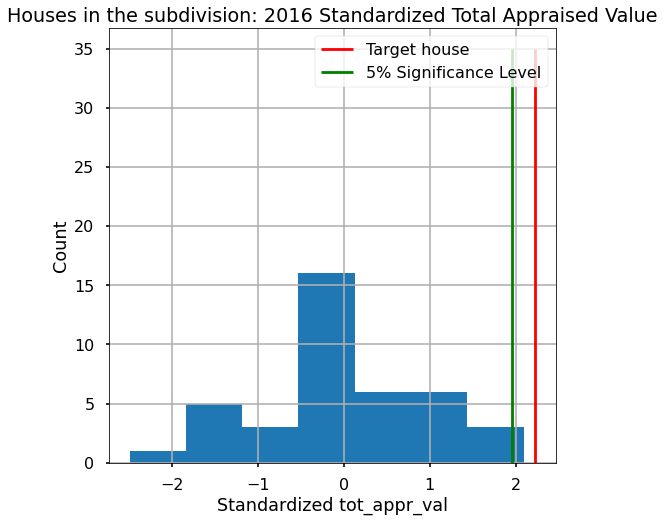

In [58]:
_ = plt.figure(figsize=(8,8))
_ = ((subdiv_comps['tot_appr_val'] - pop_mean)/pop_std).hist(bins=7)
_ = plt.title('Houses in the subdivision: 2016 Standardized Total Appraised Value')
_ = plt.vlines(zscore, 0, 35, color='red', label='Target house')
_ = plt.vlines(1.96, 0, 35, color='green', label='5% Significance Level')
_ = plt.xlabel('Standardized tot_appr_val')
_ = plt.ylabel('Count')
_ = plt.legend(loc='upper right')

Now that we have found that there is something wrong with the appraisal value of the target property, let's turn our attention to predictiong what would have been a better value, based on the subdivision houses subset.

# Feature selection

Our first step is to find a the subset of features that best associate with the target variable: `tot_appr_val`

In [61]:
subdiv.shape

(111, 33)

## Reset dtypes to work with Sweetviz
Running `sweetviz` with the `comps` data "as is" was throwing a `TypeError` associated with the categorical columns, so here I change their type to `object`.

In [ ]:
for col in subdiv_finished.columns:
    if str(subdiv_finished[col].dtype) == 'category':
        subdiv_finished[col] = subdiv_finished[col].astype('object')

In [ ]:
subdiv_finished.info()

## Run Sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
# This can take a long time to run (~37 min), change flag to True if need to re-run
if False:
    my_report = sv.analyze(subdiv_finished, target_feat='tot_appr_val')
    my_report.show_html(filepath='SWEETVIZ_REPORT_tot_appr_val_subdivision_finished.html')

The cell above creates a file (notebooks/01_Exploratory/SWEETVIZ_REPORT_tot_appr_val_subdivision_finished.html) with the resulting plots.

# Features exploration
Let's start by review the association plot in the sweetviz report.

![Sweetviz all variables association](figures/sv_all_variables_association_subdivision_finished.png)

Impressive!

There is a strong association in most variables. I'm particularly interested in exploring the associations with the total appraise value (`tot_appr_val`) so let's look at its individual association table.

![total apprasied value association tables](figures/tot_appr_val_associations_tables_subdivision_finished.png)

Now let's select the numerical and categorical features with strong association (> 0.59) to our target variable and examine these in detail.

In [ ]:
num_features = [
    'act_ar',
    'gross_ar',
    'eff_ar',
    'im_sq_ft',
    'heat_ar',
    'bld_ar',
    'prior_tot_appr_val',
    'base_area_upr',
    'perimeter'
]
    
cat_features = [
    'fixtures_total',
    'room_half_bath',
    'room_total',
    'room_bedroom',
    'room_rec',
    'room_full_bath',
    'story_height_index'
]

# Selected features analysis

## Total appraised value: tot_appr_val
Let's begin with a description of our target variable: total appraised value.

In [ ]:
from src.visualization.visualize import plot_ecdf, plot_counts, plot_hist

Check for null values

In [ ]:
subdiv_finished['tot_appr_val'][subdiv_finished['tot_appr_val'].isna()]

let's remove these from the comps dataframe

In [ ]:
subdiv_finished.dropna(axis=0, how='any', subset=['tot_appr_val'], inplace=True)

Now let's build the plots

In [ ]:
col ='tot_appr_val'
series = subdiv_finished[col]

In [ ]:
series.describe()

In [ ]:
plot_hist(series, col, bins=7)

So the most common value is around $220k with a right-skewed distribution.

In [ ]:
plot_ecdf(series, col)

More than 90% of the properties are valued less than ~$280K

## Check for features interdependence
I'd like to drop highly interdependent features. Since there are so many to check, I'll group, compare, and select them first by major categories (area and fixtures), and then repeat the process for the final feature selection. 

## Area metric

These features were encountered first on the notebook: [notebooks/01_Exploratory/1.0-rp-hcad-data-view-building-res](1.0-rp-hcad-data-view-building-res.ipynb) and [notebooks/01_Exploratory/1.0-rp-hcad-data-view-exterior](1.0-rp-hcad-data-view-exterior.ipynb).

Here is a brief description:

1. im_sq_ft: Improvement area.
2. act_ar: Actual area. For residential properties this is the base area of the house.
3. heat_ar: Living Area or Building sqft of a residential building. 
4. gross_ar: Usually equal to Actual area, except in 1+1/2 story houses. Commercial properties do not use Gross Area.
5. eff_ar: Effective area. This is used in determining the market value of the improvements, but there is no clear definition in the HCAD website.
6. base_area_upr: Possibly the upper floor base area.

In [ ]:
areas = [
    'act_ar',
    'gross_ar',
    'eff_ar',
    'im_sq_ft',
    'heat_ar',
    'bld_ar',
    'base_area_upr',
    'perimeter'
]

In [ ]:
_ = sns.pairplot(subdiv_finished.loc[:, areas])

In [ ]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(subdiv_finished.loc[:, areas].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Areas')

Since most areas are highly correlated between them, we can select one to continue our analysis. In addition, `base_area_upr` and `perimeter` are highly correlated so we can also select one of these two. From this group, I think the most accessible features are the improvement area (`im_sq_ft`) since it represents the sum of all the areas of the buildings in the property and the perimeter. These values should be relatively easy to obtain for a homeowner. 

## Fixtures

In [ ]:
fixtures = [
    'fixtures_total',
    'room_half_bath',
    'room_total',
    'room_bedroom',
    'room_rec',
    'room_full_bath',
    'story_height_index'
]

In [ ]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(subdiv_finished.loc[:, fixtures].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Fixtures')

In [ ]:
for fixture in fixtures:
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.stripplot(x=fixture, y='tot_appr_val', data=subdiv_finished)
    
    # Calculate number of obs per group & median to position labels
    medians = subdiv_finished.groupby([fixture])['tot_appr_val'].median().values
    nobs = subdiv_finished[fixture].value_counts().sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='medium', color='k', weight='bold')

It looks like independently of the selected fixture, the more the merrier (more valuable house). Also, they are not as well correlated between them as the house areas evaluated before.

# Check independence of selected features

## Is the total number of bathrooms a function of the house size?

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.stripplot(x='room_full_bath', y='im_sq_ft', data=subdiv_finished)

# Calculate number of obs per group & median to position labels
medians = subdiv_finished.groupby(['room_full_bath'])['im_sq_ft'].median().values
nobs = subdiv_finished['room_full_bath'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='medium', color='k', weight='bold')

It looks like the bigger the house the more full bathrooms it has.

I think there is enough variability in this plot to keep both features.

## Re-run sweetviz on selected features

In [ ]:
keep = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'im_sq_ft',
    'perimeter',
    'fixtures_total',
    'room_half_bath',
    'room_total',
    'room_bedroom',
    'room_rec',
    'room_full_bath',
    'story_height_index'
]

In [ ]:
features = subdiv_finished.loc[:, keep]

In [ ]:
if False:
    my_report = sv.analyze(features, target_feat='tot_appr_val')
    my_report.show_html(filepath='SWEETVIZ_REPORT_subdivision_finished_features.html')

Now the dependency between the selected features is clear in the sweetviz association plot:

![Sweetviz selected features only association](figures/sv_features_association_subdivision_finished.png)

There is a lot of dependence between these features, so we need to approach the modeling step one feature at a time, to understand the contribution of each to the prediction.

Next, we should build a model to predict the value of the target house given the data.

# Export features

In [ ]:
save_fn = ROOT_DIR / 'data/interim/2016/features.pickle'
save_pickle(features, save_fn)

## Build linear model

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = comps['prior_tot_appr_val']
y = comps['yy_pct_change']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
X_train = X_train.to_numpy().reshape(-1, 1)
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
X_test = X_test.to_numpy().reshape(-1, 1)
y_pred = model.predict(X_test)

In [ ]:
x = X.to_numpy().reshape(-1, 1)

plt.figure(figsize=(10, 10))
_ = plt.scatter(x, y, marker='.', label='All data')
_ = plt.plot(x, model.predict(x), color='red', label='Prediction')
_ = plt.xlabel('prior_tot_appr_val')
_ = plt.ylabel('yy_pct_change')

_ = plt.legend(loc='lower right')

In [ ]:
plt.figure(figsize=(10, 10))
_ = plt.scatter(y_test, y_pred, marker='.', label='Predicted and actual')
_ = plt.plot([-1, 1], [-1, 1], color='black', label='Perfect corr. line')
_ = plt.xlabel('Actual yy_pct_change')
_ = plt.ylabel('Predicted yy_pct_change')

_ = plt.legend(loc='lower right')

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
x = model.predict(X_train)
y = y_train - x

In [ ]:
plt.figure(figsize=(10, 10))
_ = plt.scatter(x, y, marker='.', label='Residuals')
_ = plt.xlabel('Fitted yy_pct_change (predicted)')
_ = plt.ylabel('Residual')

But since there is a wide range of appraised values, it might be best to focus on the percent change difference from last to this year, so we can observe if there is a pattern using all the samples.